# ITC 6001 - PROJECT - Introduction To Big Data #
## Drouvas Panagiotis, Dendrinos Theodoros, Kontoudakis Nikolaos ##

In [4]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:
print(os.getcwd());
# change the following on your pc!
projectPath = "/home/nikos/Documents/6001_project"
dataPath = projectPath + "/ml-100k/u.data"
userPath = projectPath + "/ml-100k/u.user";

#outlier sigma limit
oSL= 3

/home/nikos/Documents/6001_project


# Q1: Exploring the Data

## Read the data

In [10]:
uData = pd.read_csv(dataPath, sep= '\t', header= None, names=["userId", "itemId", "rating", "timestamp"])
pivotedData = uData.pivot(index="userId", columns="itemId", values="rating").reset_index().rename_axis(None, axis=1)

In [12]:
# #free testing area

# display(pivotedData[pivotedData.userId== 916])
# pivotedData.to_csv("export.csv", sep=',', encoding='utf-8', index=False, header=True)
# diferentPivotMovies = uData.pivot(index="itemId", columns="userId", values="rating").reset_index().rename_axis(None, axis=1)
# display(pivotedData)
# print(diferentPivotMovies)

## Remove outliers ##

In [15]:
# for movies
movieRatingsCount = pivotedData.drop(columns="userId").notna().sum(axis= 0)
movieRatingCountMu = np.mean(movieRatingsCount)
movieRatingSigma = np.std(movieRatingsCount)
ZMovieScore = ((movieRatingsCount - movieRatingCountMu)) / movieRatingSigma

In [17]:
# for users
ratingsCount = pivotedData.drop(columns= ["userId"]).notna().sum(axis= 1)
mu = np.mean(ratingsCount)
sigma = np.std(ratingsCount)
pivotedData['ZScore'] = ((ratingsCount - mu) / sigma)

#z scores for both movies and users have been calculated in advance in order to be fair.
#otherwise if we droped some users and later calculating the movie ZScore we would also drop their ratings which would result in mistakenly calculating some movies as outliers 
removedOutliers = pivotedData[(pivotedData.ZScore > -oSL) & (pivotedData.ZScore < oSL)].drop(columns= ["ZScore"])

movieOutliers = ZMovieScore[(ZMovieScore < -oSL) | (ZMovieScore > oSL)].index
# Drop the columns from the DataFrame
removedOutliers = removedOutliers.drop(columns=movieOutliers, axis=1)

## Information ##

In [23]:
removedOutliers.drop(columns= ["userId"]).describe()
# pivotedData.to_csv("original.csv", sep=',', encoding='utf-8', index=False, header=True)

,2,3,4,5,6,8,9,10,11,12,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
count,120.000000,83.000000,197.000000,79.000000,23.000000,210.000000,291.000000,83.00000,225.000000,255.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,3.208333,3.060241,3.543147,3.367089,3.739130,3.995238,3.893471,3.86747,3.871111,4.407843,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
std,0.969240,1.243023,0.971227,0.922333,1.214211,1.009513,1.046666,1.02137,1.054883,0.787662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,4.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
50%,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.00000,4.000000,5.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
75%,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0


## Ploting ##
 plot the number of movies seen by each user, and the frequency of each rating

(array([283., 170., 111.,  80.,  53.,  59.,  45.,  48.,  35.,  33.,  29.,
         16.,  34.,  39.,  34.,  24.,  15.,  22.,  19.,  21.,  29.,  23.,
         10.,  15.,   7.,  22.,  13.,  10.,  18.,  14.,   7.,   9.,  18.,
          1.,   5.,   5.,   8.,  12.,   7.,   9.,  12.,  14.,   7.,  10.,
          4.,   5.,   3.,   7.,   8.,   5.,   5.,   3.,  11.,   3.,   9.,
          6.,   5.,   9.,   5.,   4.,   4.,   2.,   4.,   1.,   2.,   6.,
          2.,   4.,   3.,   3.,   1.,   5.,   8.,   2.,   3.,   2.,   2.,
          1.,   1.,   2.,   6.,   2.,   3.,   3.,   3.,   1.,   3.,   1.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   3.,   5.,   2.,
          3.]),
 array([  0.  ,   2.91,   5.82,   8.73,  11.64,  14.55,  17.46,  20.37,
         23.28,  26.19,  29.1 ,  32.01,  34.92,  37.83,  40.74,  43.65,
         46.56,  49.47,  52.38,  55.29,  58.2 ,  61.11,  64.02,  66.93,
         69.84,  72.75,  75.66,  78.57,  81.48,  84.39,  87.3 ,  90.21,
         93.12,  96.03,  98.94

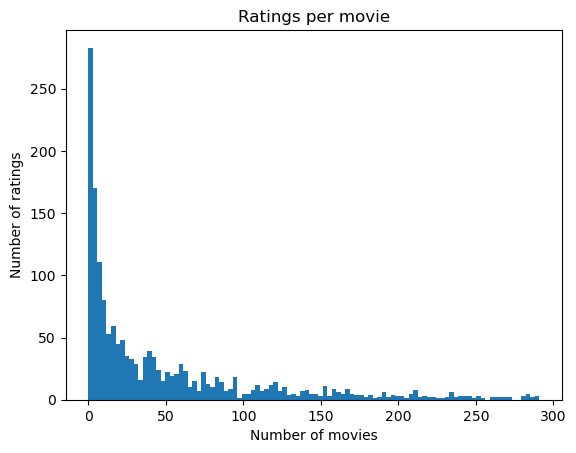

In [25]:
plt.title('Ratings per movie')
plt.xlabel("Number of movies")
plt.ylabel("Number of ratings")
plt.hist(removedOutliers.drop(columns = "userId").count(), bins= 100)

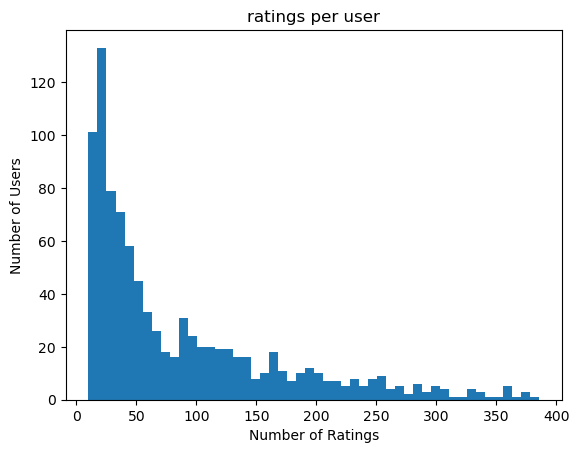

In [27]:
ratingsPerUser = removedOutliers.drop(columns = "userId").notnull().sum(axis=1)

ratingsPerUser.hist(bins=50)
plt.title('ratings per user')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.grid(False)
plt.show()

# Q2: Basic Recomended System

## Spliting data into train and test ##

In [ ]:
#random_state property allows for repitability of the spliting
trainData= removedOutliers.sample(frac=0.8,random_state=200, axis= 0)
testData= removedOutliers.drop(trainData.index)

In [ ]:
#get the number of ratings a movie has
movieRatingsCount = removedOutliers.drop(columns="userId").notna().sum(axis= 0)